Linear vs Polynomial Regression

Dummy data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

x = np.array([1,2,3,4,5]).reshape(-1,1)
y = np.array([3,6,13,28,55])

Linear Regression

In [ ]:
linear_model = LinearRegression()
linear_model.fit(x, y)
y_pred_linear = linear_model.predict(x)


Polynomial Regression (degree 2)

In [ ]:
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)
poly_model = LinearRegression()
poly_model.fit(x_poly,y)
y_pred_poly = poly_model.predict(x_poly)

Plot

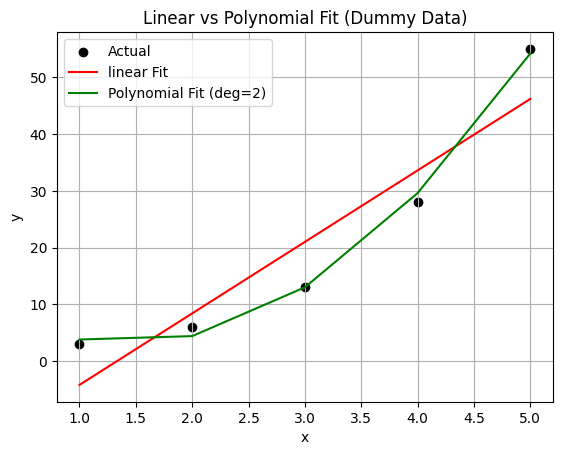

In [ ]:
plt.scatter(x,y,color='black',label='Actual')
plt.plot(x,y_pred_linear, label='linear Fit', color='red')
plt.plot(x, y_pred_poly, label='Polynomial Fit (deg=2)', color='green')
plt.title("Linear vs Polynomial Fit (Dummy Data)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


Real Dataset: Salary Prediction


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

Load dataset

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/Naresh312143/mahalingpur-python-ml/refs/heads/main/Salary_Data.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  6701 non-null   float64
 1   Salary               6699 non-null   float64
dtypes: float64(2)
memory usage: 104.9 KB


In [ ]:
df.isnull().sum()

,0
Years of Experience,3
Salary,5


In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

,0
Years of Experience,0
Salary,0


Train_test split

In [ ]:
X = df[["Years of Experience"]]
y = df["Salary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Train linear regression

In [ ]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred_lin = lin_model.predict(X_test)


Metrics

In [ ]:
mse_lin = mean_squared_error(y_test, y_pred_lin)
rmse_lin = np.sqrt(mse_lin)
r2_lin = r2_score(y_test, y_pred_lin)

print("linear Regression:")
print("mse:",mse_lin)
print("rmse:",rmse_lin)
print("r2 score:",r2_lin)

linear Regression:
mse: 946833177.7094355
rmse: 30770.654489455297
r2 score: 0.6669549610495003


Degree2

In [32]:
poly2 = PolynomialFeatures(degree=2)
X_train_poly2 = poly2.fit_transform(X_train)
X_test_poly2 = poly2.transform(X_test)

poly2_model = LinearRegression()
poly2_model.fit(X_train_poly2, y_train)
y_pred_poly2 = poly2_model.predict(X_test_poly2)

Metrics

In [ ]:
mse_poly2 = mean_squared_error(y_test, y_pred_poly2)
rmse_poly2 = np.sqrt(mse_poly2)
r2_poly2  = r2_score(y_test, y_pred_poly2)

Degree4

In [33]:
poly4 = PolynomialFeatures(degree=4)
X_train_poly4 = poly4.fit_transform(X_train)
X_test_poly4 = poly4.transform(X_test)

poly4_model = LinearRegression()
poly4_model.fit(X_train_poly4, y_train)
y_pred_poly4 = poly4_model.predict(X_test_poly4)


Metrics

In [34]:

mse_poly4 = mean_squared_error(y_test, y_pred_poly4)
rmse_poly4 = np.sqrt(mse_poly4)
r2_poly4 = r2_score(y_test, y_pred_poly4)

print("\nPolynomial Regression (Degree 2):")
print("MSE:", mse_poly2)
print("RMSE:", rmse_poly2)
print("R2 Score:", r2_poly2)

print("\nPolynomial Regression (Degree 4):")
print("MSE:", mse_poly4)
print("RMSE:", rmse_poly4)
print("R2 Score:", r2_poly4)


Polynomial Regression (Degree 2):
MSE: 726857249.7211918
RMSE: 26960.290238074067
R2 Score: 0.7443306732971963

Polynomial Regression (Degree 4):
MSE: 720033651.6859531
RMSE: 26833.44278481524
R2 Score: 0.7467308484568018


Visualization of All Models

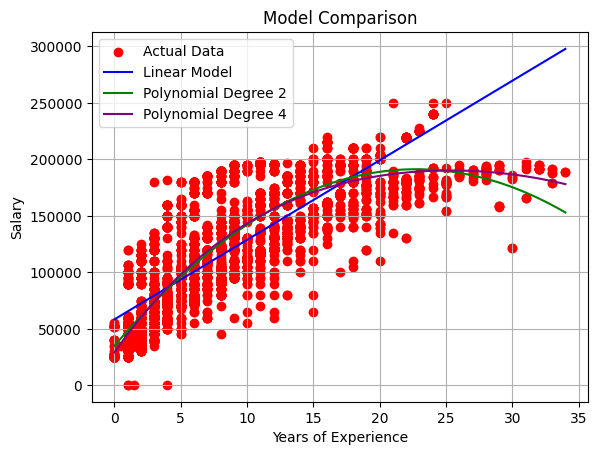

In [35]:
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)


X_range_df = pd.DataFrame(X_range, columns=["Years of Experience"])


X_range_poly2 = poly2.transform(X_range_df)
X_range_poly4 = poly4.transform(X_range_df)


y_range_lin = lin_model.predict(X_range_df)
y_range_poly2 = poly2_model.predict(X_range_poly2)
y_range_poly4 = poly4_model.predict(X_range_poly4)


plt.scatter(X, y, color='red', label='Actual Data')
plt.plot(X_range, y_range_lin, label='Linear Model', color='blue')
plt.plot(X_range, y_range_poly2, label='Polynomial Degree 2', color='green')
plt.plot(X_range, y_range_poly4, label='Polynomial Degree 4', color='purple')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Model Comparison")
plt.legend()
plt.grid(True)
plt.show()